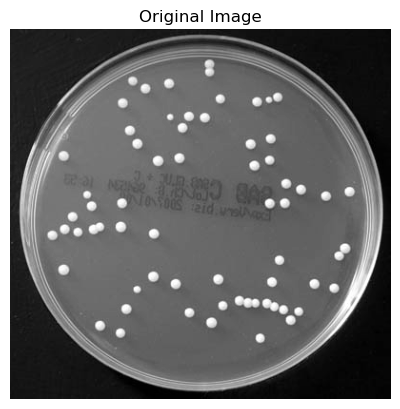

Number of CFUs: 60


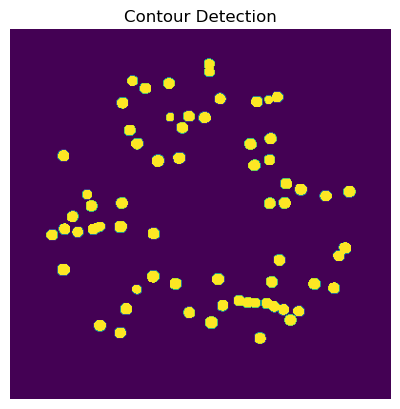

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Load the image
image_path = 'colonies.jpg'
image = cv2.imread(image_path)


#Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#reduces noise
denoise_image = cv2.fastNlMeansDenoising(gray_image, h=30, templateWindowSize=7, searchWindowSize=21)

#Thresholding
#The last two parameters correspond with blockSize (the region around pixels, needs to be odd) and C (adjusts the threshold value calculation)
binary_image = cv2.adaptiveThreshold(denoise_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 13, -10)

#inverses the image
binary_image = 255 - binary_image

#Create a circular mask to exclude the agar plate
#the numpy command creates an array of zeroes to create the mask.
height, width = binary_image.shape
mask = np.zeros((height, width), np.uint8)
cv2.circle(mask, (width // 2, height // 2), min(height, width) // 2 - 29, 255, -1)


#Apply the mask to the binary image
binary_image_masked = cv2.bitwise_and(binary_image, binary_image, mask=mask)

# Find contours in the binary image again, after excluding the agar plate
contours, _ = cv2.findContours(binary_image_masked, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours by area
min_area = 10  # minimum area for a contour to be considered a colony
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

# Count the number of colonies
num_colonies = len(filtered_contours)

# Draw the contours on the original image
result = binary_image_masked.copy()
cv2.drawContours(result, contours, -1, (255, 255, 255), 2)

#Display original image in grayscale
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

#Contour detection is highlighted
plt.title('Contour Detection')
plt.imshow(result)
plt.axis('off')

# Print the number of contours (CFUs)
print(f'Number of CFUs: {num_colonies}')


#Jewel's Contributions




#Molly

